### 1)  Implement kmeans function- this performs one trial of the k-means algorithm, starting with a random initialization of k data points

In [3]:
import numpy as np
def kmeans(data, k):
    num_examples, num_features = data.shape
    old_centroids = np.zeros((k, num_features))
    random_indices = np.random.choice(num_examples, size=k, replace=False)
    cluster_centroids = data[random_indices, :]
    cluster_assignments = [0]*num_examples

    repeat = True
    while repeat:
        # Cluster Assignment Step
        clusteridx_to_examples = dict()
        for i in range(num_examples):
            # Find cluster point closest to data point
            mindist, minidx = np.linalg.norm(data[i]-cluster_centroids[0]), 0
            for j in range(1, k):
                if np.linalg.norm(data[i]-cluster_centroids[j]) < mindist:
                    mindist, minidx = np.linalg.norm(data[i]-cluster_centroids[j]), j
            
            # Store data point in index_to_examples dictionary
            cluster_assignments[i] = minidx
            if minidx in clusteridx_to_examples:
                clusteridx_to_examples[minidx].append(i)
            else:
                clusteridx_to_examples[minidx] = [i]
                
        # Move centroids step
        for clusteridx, examples_in_cluster in clusteridx_to_examples.items():
            cluster_centroids[clusteridx] = np.mean(np.array([data[i] for i in examples_in_cluster]), axis=0)
        
        # Repeat iff cluster centroids have changed 
        comparison = old_centroids == cluster_centroids
        repeat = not comparison.all()
        old_centroids = np.copy(cluster_centroids)
        
    return cluster_centroids, cluster_assignments

### 2) Run kmeans for breast cancer data for 2 <= k <= 8

In [6]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()
data = dataset.data
num_examples = data.shape[0]
distortions = []
for k in range(2,8):
    cluster_centroids, cluster_assignments = kmeans(data, k)
    distortion = 0
    for i in range(num_examples):
        distortion += np.linalg.norm(data[i] - cluster_centroids[cluster_assignments[i]])**2
    distortions.append(distortion/num_examples)
distortions

[136982.6008405956,
 88783.42629047789,
 51364.748070263326,
 36331.63689693994,
 30099.055519437814,
 23468.086724960584]

### 3) Plot distortion vs k

Text(0, 0.5, 'Distortion')

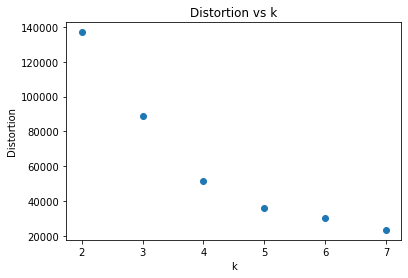

In [10]:
import matplotlib.pyplot as plt
plt.scatter(list(range(2,8)), distortions)
plt.title("Distortion vs k")
plt.xlabel("k")
plt.ylabel("Distortion")